### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "tune_scan_30cm_neg_oct"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy                                         
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309                               4.5   
                                                                       60.310                               4.5   
                                                                       60.311                               4.5   
                                                                       60.312                               4.5   
                                                                       60.313                               4.5   
...                                                                                                         ...   
                                                                62.323 60.328                               4.5   
                                                                       60.329                               4.5   
                                                                62.324 60.328                               4.5   
                                                                       60.329                               4.5   
                                                                62.325 60.329                               4.5   

                                                                                   qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309  62.305   
                                                                       60.310  62.305   
                                                                       60.311  62.305   
                                                                       60.312  62.305   
                                                                       60.313  62.305   
...                                                                               ...   
                                                                62.323 60.328  62.323   
                                                                       60.329  62.323   
                                                                62.324 60.328  62.324   
                                                                       60.329  62.324   
                                                                62.325 60.329  62.325   

                                                                                   qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309  60.309   
                                                                       60.310  60.310   
                                                                       60.311  60.311   
                                                                       60.312  60.312   
                                                                       60.313  60.313   
...                                                                               ...   
                                                                62.323 60.328  60.328   
                                                                       60.329  60.329   
                                                                62.324 60.328  60.328   
                                                                       60.329  60.329   
                                                                62.325 60.329  60.329   

                                                                                dqx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy             
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309  15.0   
      

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,...,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323,62.324,62.325
qy,,,,,,,,,,,,,,,,,,,,,
60.309,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,4.500,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,4.500,4.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.500,4.5,4.5,4.531,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,4.500,4.5,4.5,4.500,4.844,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.500,4.5,4.5,4.500,NaN,4.938,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.500,NaN,4.5,4.531,5.000,5.125,4.969,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.531,4.5,4.5,4.562,4.812,4.688,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.500,4.5,4.5,4.562,4.688,4.906,4.750,5.062,4.969,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


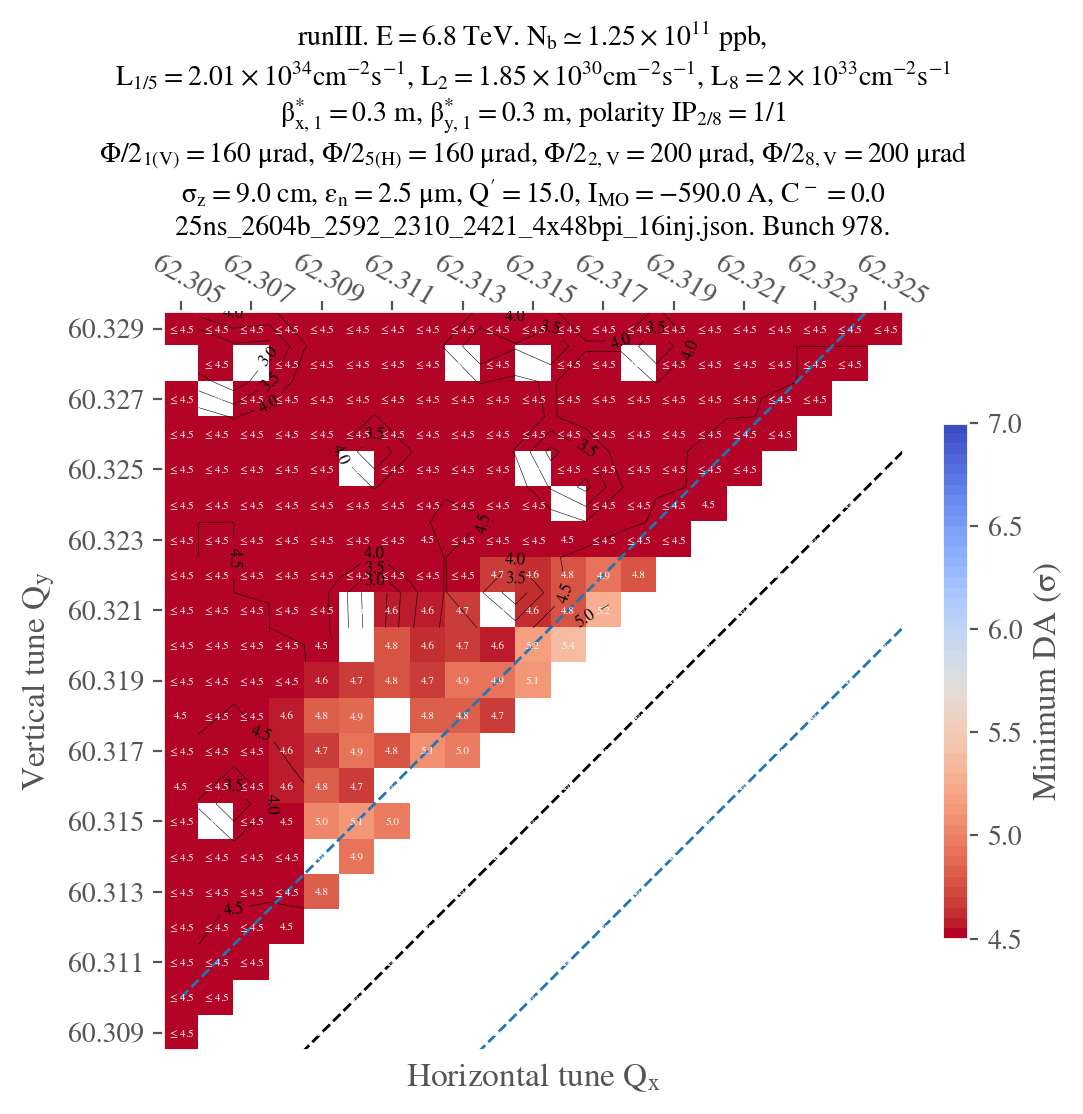

In [4]:

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = True,
    green_contour = 5.5,
    extended_diagonal=False,
    vmin = 4.5,
    vmax = 7,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)